# Linear programming and duality

This iPython notebook will be a review of linear programming (focusing on the simplex algorithm) and duality. It will also be an introduction to using iPython.

Consider the following problem:

(insert) Description of the problem

This problem can be modelled as:




In [1]:
# First, let us import some useful python packages.

# numpy for scientifical computing (we will be using this for...)
import numpy as np

#matplotbib for drawing
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from IPython.display import display

## Consider the following optimisation problem:

Min $c^t x$

s.t. $Ax ≤ b$

We will consider the following data:


In [2]:
A = np.matrix('1 2; 2 1')
b = np.matrix('6  ; 6')
c = np.matrix('2.0 3.0')

Let us plot the feasible region given by the two constraints:

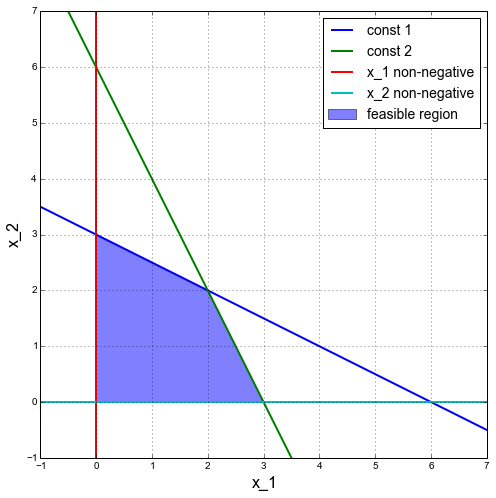

In [9]:
# create the plot object
fig, ax = plt.subplots(figsize=(8, 8))
s = np.linspace(-1, 7)

# add first constraint: x_1 + 2x_2 <= 2
ax.plot(s, (b[0,0]-A[0,0]*s)/A[0,1], lw=2, label='const 1')

# add second constraint: 3x_1 + 4x_2 ≤  3
ax.plot(s, (b[1,0] - A[1,0]*s)/A[1,1], lw=2, label='const 2')

# add non-negativity constraints
ax.plot(np.zeros_like(s), s, lw=2, label='x_1 non-negative')
ax.plot(s, np.zeros_like(s), lw=2, label='x_2 non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (0., 3),
    (2, 2),
    (3, 0),
    (0., 0.),
    (0., 0.),
])

patch = PathPatch(path, label='feasible region', alpha=0.5)
ax.add_patch(patch)

# labels and stuff
plt.xlabel('x_1', fontsize=16)
plt.ylabel('x_2', fontsize=16)
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.legend(fontsize=14)
plt.grid()
plt.show()

# Normal form

Please, insert the A matrix in normal form:

In [10]:
A = np.matrix('1 2 1 0; 2 1 0 1')  # Refer to A original definition if you need to.

# Basis solutions

Choose basic variables.
(Remember that we are indexing our python vector starting from zero, so x1 has index 0, x2 index 1, and so on...)

In [14]:
basic = [0, 1]  # Choose two basic variables, I am choosing x3 and x4

Now, we are going to plot the basic solution you chose:

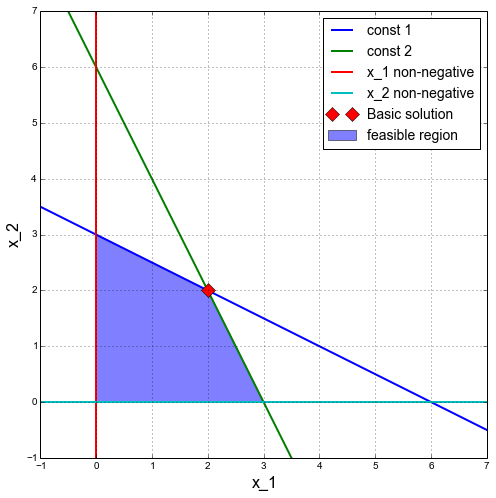

In [15]:
x = [0, 0, 0, 0]  # This may not be a feasible solution.

curSol = np.linalg.solve(A[:, [basic[0], basic[1]]], b)
x[basic[0]] = curSol[0, 0]
x[basic[1]] = curSol[1, 0]

lines = ax.plot(x[0], x[1], 'rD', markersize=10, label='Basic solution')
ax.legend(fontsize=14)
display(fig)
lines.pop(0).remove()

#  Simplex method

Choose one variable to enter the basis:

In [16]:
enteringVar = 1  # Index of the variable to enter the basis.

Calculating the simplex direction...

In [17]:
B = A[:, [basic[0], basic[1]]]
yk = np.linalg.solve(B, A[:, enteringVar])
yk

matrix([[ 0.],
        [ 1.]])

Now, let's plot the simplex direction and the new solution...

In [18]:
oldX = x[:]  # Let's save the old solution.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide


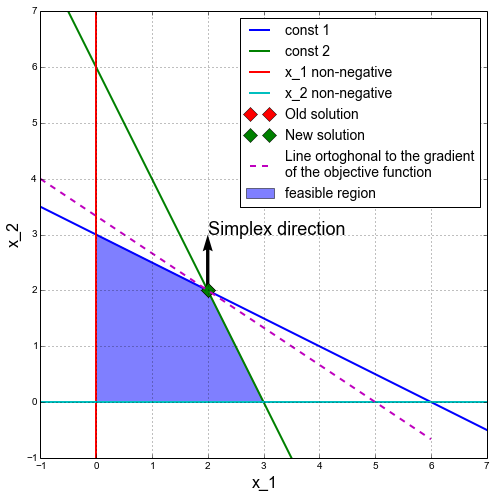

In [19]:
soa = np.array([[oldX[0], oldX[1], yk[0, 0], yk[1, 0]]]) 
X,Y,U,V = zip(*soa)

# This plots the Simplex direction:
Q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
T = ax.text(oldX[0] + yk[0, 0], oldX[1] + yk[1, 0], 'Simplex direction', fontsize=18)

# Plotting old solution:
linesOld = ax.plot(oldX[0], oldX[1], 'rD', markersize=10, label='Old solution')

leaveCand = []
for i, bi in enumerate(b):
    leaveCand.append((bi, bi/yk[i]))

leaveCandidates = []
for j, bi in enumerate(basic):
    if yk[j, 0] > 0:
        leaveCandidates.append((bi, b[j, 0]/yk[j, 0]))

leavingVar = min(leaveCandidates, key=lambda var:var[1])[0]

# At this point, we have the old solution and we can calculate the new one.

idxLeaving = basic.index(leavingVar)
basic[idxLeaving] = enteringVar
newSol = np.linalg.solve(A[:, [basic[0], basic[1]]], b)
x[basic[0]] = newSol[0, 0]
x[basic[1]] = newSol[1, 0]

linesNew = ax.plot(x[0], x[1], 'gD', markersize=10, label='New solution')

# We also will plot a line orthogonal to the gradient direction at the new solution:
xStart, xEnd = ax.get_xlim()
xOrtGrad = np.arange(xStart, xEnd, 1)  # Maybe a step of 1 unit is not good for your case.
yOrtGrad = x[1] + c[0, 0]/c[0, 1]*x[0] - c[0, 0]/c[0, 1]*xOrtGrad
label = 'Line ortoghonal to the gradient\nof the objective function'
ortGrad = ax.plot(xOrtGrad, yOrtGrad, '--', label=label, linewidth=2)

ax.legend(fontsize=14)

display(fig) 
Q.remove()
linesOld.pop(0).remove()
linesNew.pop(0).remove()
ortGrad.pop(0).remove()
T.remove()
ax.legend_ = None

# PuLP!

Now we will learn how to create and solve an instance of a model using PuLP.

First, we need to import the library:

In [199]:
import pulp  # Importing de library

Then, we create the object that will hold the problem and add variables, define objective functions and constraints.

In [143]:
prob = pulp.LpProblem('Example', pulp.LpMaximize)  # Creating the problem object.

# Creating the variables:
x1 = pulp.LpVariable('x1', lowBound=0.0)
x2 = pulp.LpVariable('x2', lowBound=0.0)

# Defining the objective function:
prob += 2*x1 + 3*x2

# Defining the constraints:
prob += x1 + 2*x2 <= 6
prob += 2*x1 + x2 <= 6
prob

Example:
MAXIMIZE
2*x1 + 3*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 6

_C2: 2 x1 + x2 <= 6

VARIABLES
x1 Continuous
x2 Continuous

And then, we just ask it to be solved and print the solutions:

In [144]:
prob.solve()  # Solving
pulp.value(prob.objective), x1.varValue, x2.varValue  # Getting the answers.

(10.0, 2.0, 2.0)